"""

Besoin d'effectuer un clustering pour rÃ©sumer les segments de clientÃ¨le.

"""

# ___IMPORTATION___

In [ ]:
!pip install yellowbrick==1.4
!pip install category_encoders==2.4.0

     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 274 kB 15.4 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 86 kB 5.1 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 233 kB 21.6 MB/s 
     |â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 9.9 MB 38.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder
#import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df = pd.read_csv("marketing_campaign.csv", sep=";");df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04/09/2012       58       635  ...                  7   
1            1  08/03/2014       38        11  ...                  5   
2            0  21/08/2013       26       426  ...                  4   
3            0  10/02/2014       26        11  ...                  6   
4            0  19/01/2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13/06/2013       46       709  ...                  5   
2236         1  10/06/2014       56       406  ...                  7   
2237         0  25/01/2014       91       908  ...                  6   
2238         1  24/01/2014        8       428  ...                  3   
2239         1  15/10/2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

# ___EXPLORATION___

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


<AxesSubplot:>

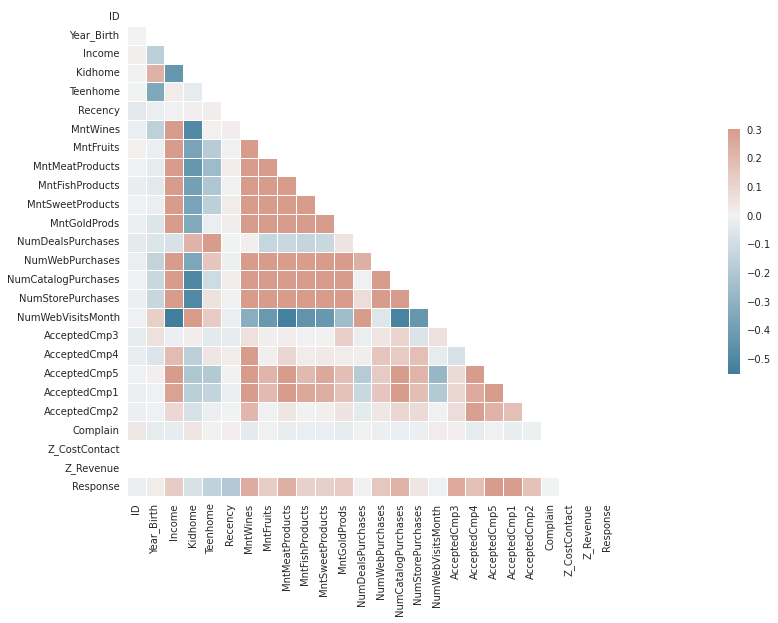

In [ ]:
# Correlation

mask = np.triu(np.ones_like(df.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(40, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

## ___Filtreur___

In [ ]:
# parcour du dataframe filtrer et suppression des donnÃ©es
df_copy1 = df

# Ordonner les valeurs de la date
df_copy1['Dt_Customer'] = pd.to_datetime(df_copy1['Dt_Customer'], format="%d/%m/%Y")

# filtrer les valeurs NAN

df_copy1['Income'].fillna(value = df_copy1['Income'].mean(), inplace=True);
#df_copy1.isnull().sum()

# filtrer les doublons
df_copy1 = df_copy1.drop_duplicates(subset=['Year_Birth', 'Education','Marital_Status', 'Income'])

# filtrer et unifier la colonne 'marital_status'
df_copy1 =df_copy1.replace({'Marital_Status': ['Widow', 'Alone', 'Divorced']}, {'Marital_Status': 'Single'}, regex=False)
df_copy1 = df_copy1.replace({'Marital_Status': 'Married'}, {'Marital_Status': 'Together'}, regex=False)

# filtrer la columns Income --------> "int" pour suppression des ",|| ."
df_copy1['Income'] = df_copy1["Income"].round(0).astype(int)

### ___Suppression___

In [ ]:
# suppression des lignes "absurdes" (qui possÃ¨dent des valeurs ne semblants pas cohÃ©rentes / rÃ©ponses au hasard des utilisateurs)
#---------------------------------------------------------------------------------------------------------------------------------#
# "marital_status" Ã©tranges / non classables

df_copy1.drop(df_copy1.index[df_copy1['Marital_Status'] == 'Absurd'], inplace=True)
df_copy1.drop(df_copy1.index[df_copy1['Marital_Status'] == 'YOLO'], inplace=True)

# "Income" Ã©tranges
df_copy1.drop(df_copy1.index[df_copy1['Income'] == 666666], inplace=True)

# "Year_Birth" Ã©tranges
df_copy1.drop(df_copy1.index[df_copy1['Year_Birth'] <= 1939], inplace=True)

### ___Pertinence___

In [ ]:
# Copie du DF en ne gardant uniquement que les colonnes qui nous semblents pertinentes 
# au regroupement par le comportement d'achat 

df_focused_infos = df_copy1[["Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome", 
        "Dt_Customer", "Recency", "MntWines","MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds", "NumWebPurchases", "NumCatalogPurchases", 
        "NumStorePurchases", "NumWebVisitsMonth","NumDealsPurchases"]]

#Creation de l'age et determination du nombre d'enfant (pertinence)
colum_sum = ['Kidhome','Teenhome']
df_focused_infos["Age"] = 2021 - df_focused_infos['Year_Birth']
df_focused_infos['Children']=df_focused_infos[colum_sum].sum(axis=1)
df_focused_infos = df_focused_infos.drop(["Year_Birth","Kidhome","Teenhome"], axis=1)


<ipython-input-8-72e6469a5293>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focused_infos["Age"] = 2021 - df_focused_infos['Year_Birth']
<ipython-input-8-72e6469a5293>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focused_infos['Children']=df_focused_infos[colum_sum].sum(axis=1)


# __DATA VISUALISATION__

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


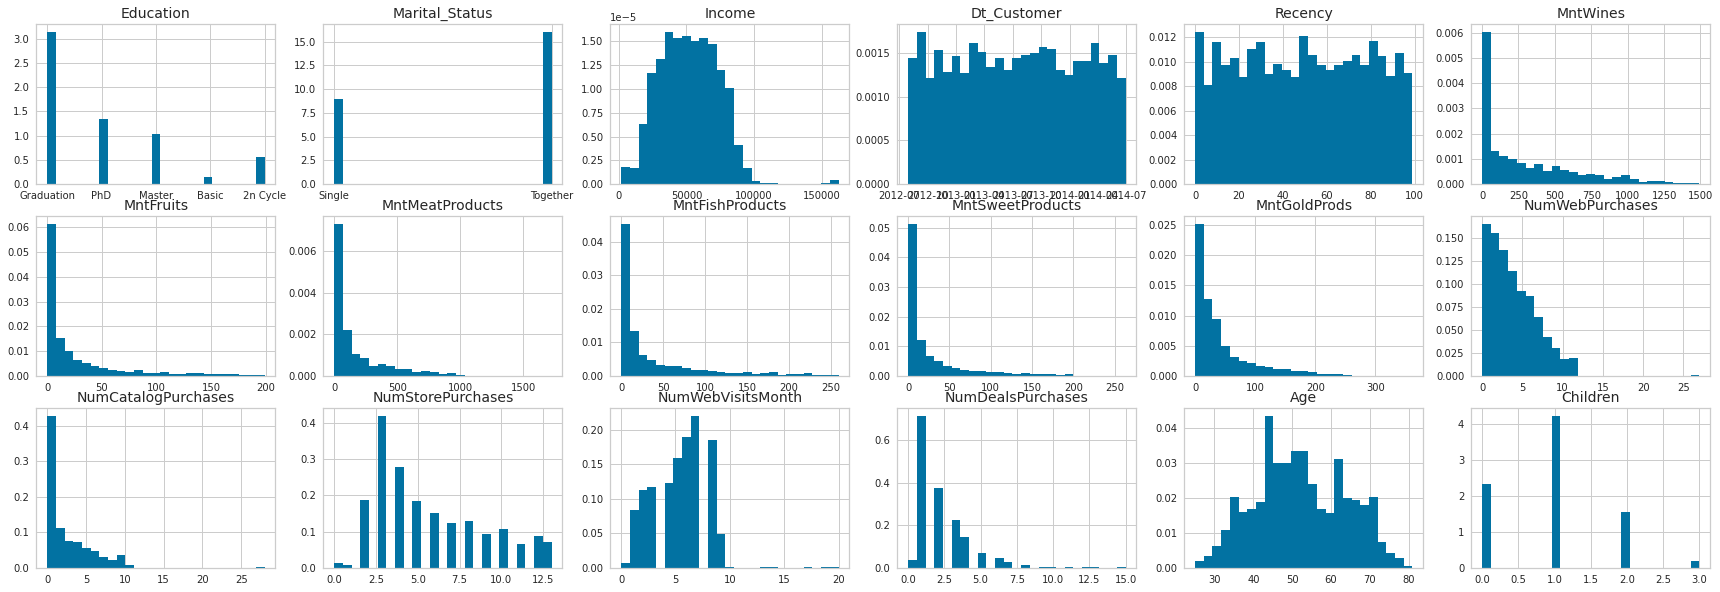

In [ ]:
X = df_focused_infos[df_focused_infos.columns[:]].values

fig = plt.figure(figsize=(30, 10))

for i in range(X.shape[1]):
    ax = fig.add_subplot(3,6, (i+1))
    h = ax.hist(X[:, i], bins=25, density=True, edgecolor='none')
    ax.set_title(df_focused_infos.columns[i], fontsize=14)

### ___Correlation___

<AxesSubplot:>

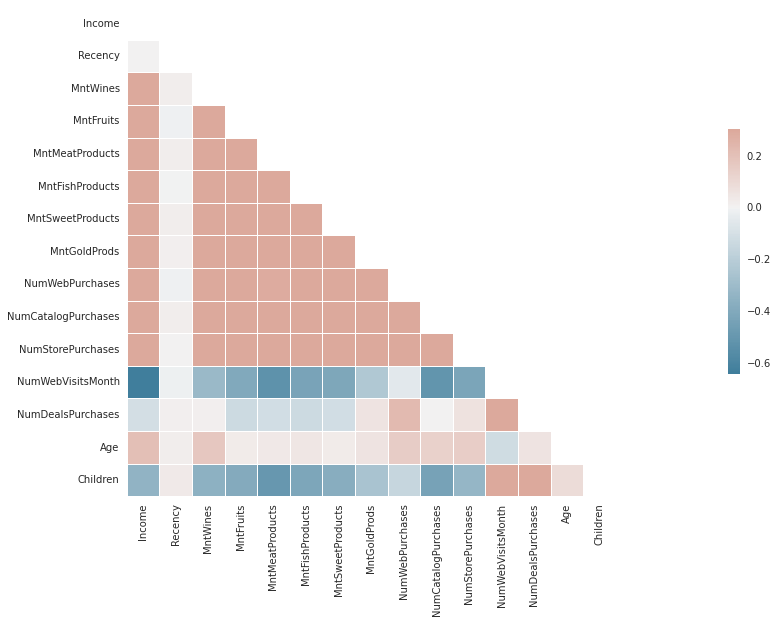

In [ ]:
mask = np.triu(np.ones_like(df_focused_infos.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(40, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(df_focused_infos.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

### ___Encoding___

In [ ]:
# marital_status
df_focused_infos['Marital_Status'] = df_focused_infos['Marital_Status'].replace({'Single':0, 'Together':1})

# education
# (need finer tweeking, there is a hierarchy between these values.)

le = LabelEncoder()
df_focused_infos['Education'] = le.fit_transform(df_focused_infos['Education'])
df_focused_infos


Education  Marital_Status  Income Dt_Customer  Recency  MntWines  \
0             2               0   58138  2012-09-04       58       635   
1             2               0   46344  2014-03-08       38        11   
2             2               1   71613  2013-08-21       26       426   
3             2               1   26646  2014-02-10       26        11   
4             4               1   58293  2014-01-19       94       173   
...         ...             ...     ...         ...      ...       ...   
2232          2               0   26816  2012-08-17       50         5   
2235          2               1   61223  2013-06-13       46       709   
2237          2               0   56981  2014-01-25       91       908   
2238          3               1   69245  2014-01-24        8       428   
2239          4               1   52869  2012-10-15       40        84   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0            88              546              172                88   
1             1                6                2                 1   
2            49              127              111                21   
3             4               20               10                 3   
4            43              118               46                27   
...         ...              ...              ...               ...   
2232          1                6                3                 4   
2235         43              182               42               118   
2237         48              217               32                12   
2238         30              214               80                30   
2239          3               61                2                 1   

      MntGoldProds  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0               88                8                   10                  4   
1                6                1                    1                  2   
2               42                8                    2                 10   
3                5                2                    0                  4   
4               15                5                    3                  6   
...            ...              ...                  ...                ...   
2232             3                0                    0                  3   
2235           247                9                    3                  4   
2237            24                2                    3                 13   
2238            61                6                    5                 10   
2239            21                3                    1                  4   

      NumWebVisitsMonth  NumDealsPurchases  Age  Children  
0                     7                  3   64         0  
1                     5                  2   67         2  
2                     4                  1   56         0  
3                     6                  2   37         1  
4                     5                  5   40         1  
...                 ...                ...  ...       ...  
2232                  4                  1   35         0  
2235                  5                  2   54         1  
2237                  6                  1   40         0  
2238                  3                  2   65         1  
2239                  7                  3   67         2  

[2032 rows x 18 columns]

# __SEGMENTATION__

### 
A partir d'ici on chercher a rÃ©pondre Ã  la question sur l'analyse de personnalitÃ©s cliente
nous nous efforcerons d'y rÃ©pondre en determinant deja 3 grands segments sur lesquels seront reparti notre analyse personnel des donnÃ©es

    segment 1 : client-produit achete
    segment 2 : client - lieu d'achat selon les revenus
    segment 3 : produit achetÃ© - lieu d'achat

# ___K-MEAN___

In [ ]:
#Help define a right k-cluster with -------> Elbown

df_kmean = df_focused_infos[["Age", "Income", "Children", "Recency", "MntWines", "Marital_Status", "Education" ,"MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts","MntGoldProds", "NumWebPurchases", "NumCatalogPurchases", 
        "NumStorePurchases", "NumWebVisitsMonth","NumDealsPurchases"]]
#---------------------------------------------------------------------------------------------------------------

### ___Standardisation___

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(df_kmean)

df_standard = pd.DataFrame(scaler.transform(df_kmean),columns= df_kmean.columns )

### ___PCA___

In [ ]:
#Apply the PCA on The Elbown Method
pca = PCA(n_components=7)
pca.fit(df_standard)

variance = pca.explained_variance_ratio_.sum()*100
variance
#ðŸ˜ŽðŸ˜ŽðŸ˜Ž

75.624640622631

In [ ]:
#variance expliquÃ©e
print(pca.explained_variance_)

[6.06899084 1.77416712 1.34978048 1.00962285 1.00806657 0.89147746
 0.76041356]


In [ ]:
#nombre de composant sur lequ
print(pca.explained_variance_ratio_)

[0.35682377 0.10431141 0.07935978 0.05936035 0.05926885 0.05241404
 0.0447082 ]


### ___Elbown___

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


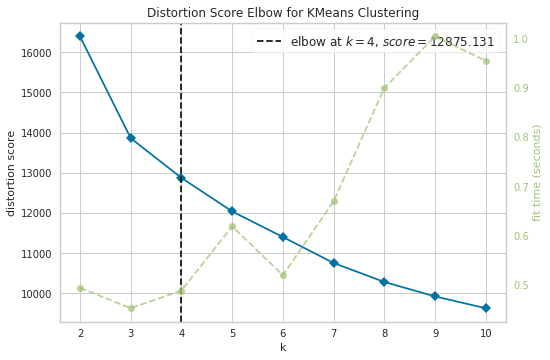

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Data_pca = pd.DataFrame(pca.transform(df_standard))

elb_vis = KElbowVisualizer(KMeans(), k=10)
elb_vis.fit(Data_pca) 
elb_vis.show()

### ___Silhouette___

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4, random_state=0))

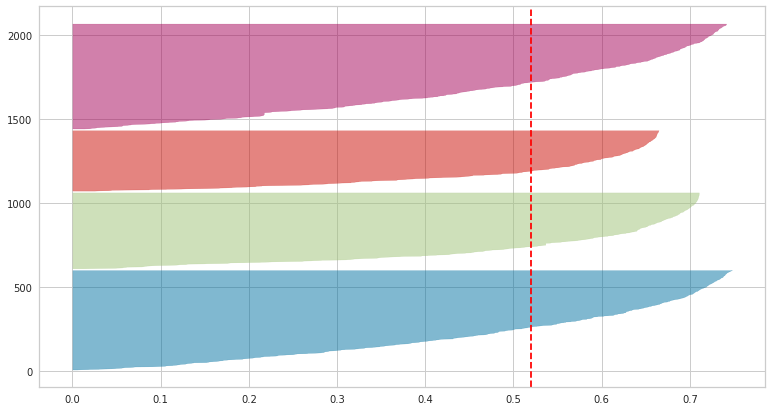

In [ ]:
#silhouette (evaluation de la qualite d'un cluster) ------->  [3,4,5]
plt.figure(figsize=(13,7))
k_model = KMeans(n_clusters= 4, random_state= 0)
    #fit the visualisation
visualizer = SilhouetteVisualizer(k_model, colors='yellowbrick')
visualizer.fit(df_kmean)

# __CLUSTERING__

### ___Label___

In [ ]:
# Generate a label int values of my clusters 
 
kmeans = KMeans(n_clusters = 4, random_state=50)
 
label_prediction = kmeans.fit_predict(Data_pca)
label_prediction

array([0, 1, 0, ..., 0, 3, 2], dtype=int32)

In [ ]:
df["Clusters"] = pd.Series(label_prediction)
labels = ["Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4"]

cluster1_num = df_focused_infos[df["Clusters"]==0].shape[0]
cluster2_num = df_focused_infos[df["Clusters"]==1].shape[0]
cluster3_num = df_focused_infos[df["Clusters"]==2].shape[0]
cluster4_num = df_focused_infos[df["Clusters"]==3].shape[0]
values = [cluster1_num, cluster2_num, cluster3_num, cluster4_num]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6, title="CLUSTERS")])
fig.show()

<ipython-input-22-44267c191246>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-22-44267c191246>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-22-44267c191246>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-22-44267c191246>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [ ]:
Data_pca = pd.DataFrame(pca.transform(df_standard), columns=["col1", "col2", "col3","col4", "col5", "col6", "col7"])
fig = px.scatter_3d(Data_pca, x="col1", y="col2", z="col3", color=label_prediction, title=f"Total Explained Variance: {variance:.2f}%")
fig.show()

# ___INTERPRETATION___

### Segment 1

### Segment 2

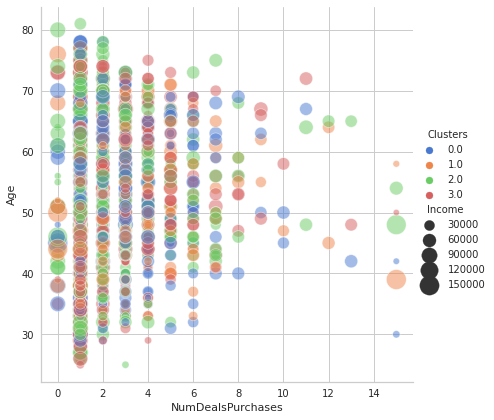

In [ ]:
sb.relplot(x=df_kmean["NumDealsPurchases"], y=df_kmean["Age"], hue=df["Clusters"], size="Income",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df_kmean)

### Segment 3

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

73.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

76.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning:

25.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



[Text(0, 0.5, '')]

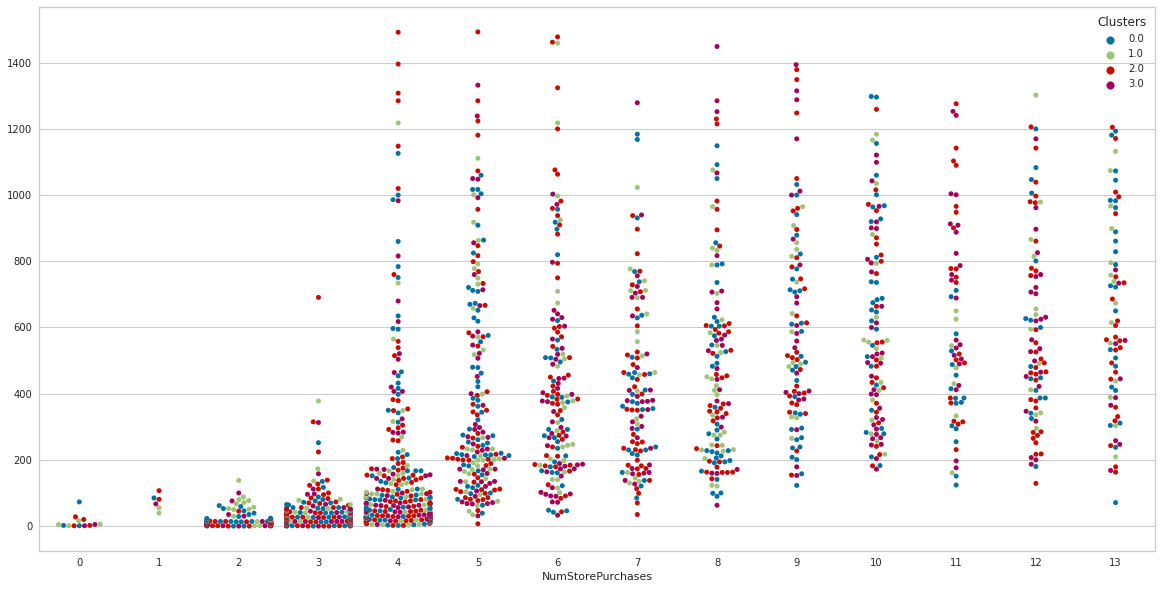

In [ ]:
plt.figure(figsize=(20,10))
ax = sb.swarmplot(data=df_kmean, x=df_kmean["NumStorePurchases"], y=df_kmean["MntWines"], hue=df["Clusters"])
ax.set(ylabel="")


# ___Conclusion___

##### Selon diffÃ©rents segments nous pouvons deduire que la reponse a l'Ã©tude du comportement client depend fortement de ce que nous voulon amÃ©liorer dans son expÃ©rience. Est-ce :
###### -une meilleur proposition de produit chez les plus jeunes;
###### -optimiser la vente des produits sur certains lieux; etc...


##### il serait plus pertinent de voir des professionnels du metier pour deduire qu'elle Ã©tude du comportement serait la plus pertinente pour les objectifs de l'entreprise/start_up

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0c8365e5-af89-4479-b1c9-90e8728d426b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>